In [32]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import model_selection
from sklearn import *

import warnings
warnings.filterwarnings('ignore')

In [33]:
%matplotlib inline

# Data Prep

Read in the data

In [34]:
df = pd.read_csv("data/nba_1415.csv")

Using data from the 14-15 and 18-19 seasons, see if players have survived for 5 years

In [35]:
df2 = set(pd.read_csv("data/nba_1819.csv")['Player'])
df1 = df['Player']

# names of repeated players
names = [item for item, count in collections.Counter(df1).items() if count > 1]
# locations of duplicate players
locations = [df.loc[df['Player'] == name] for name in names]

# if player survived 5 years
labels = [1 if player in df2 else 0 for player in df1]
df['Survived'] = labels
df.head()

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,...,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,Survived
0,Russell Westbrook,2014-2015,REG,Thunder,67,34.36,28.15,1.87,5.45,7.31,...,9.36,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,1
1,James Harden,2014-2015,REG,Rockets,81,36.80,27.37,0.93,4.74,5.67,...,7.99,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,1
2,Kevin Durant,2014-2015,REG,Thunder,27,33.80,25.41,0.59,6.00,6.59,...,8.81,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,1
3,LeBron James,2014-2015,REG,Cavaliers,69,36.14,25.26,0.75,5.30,6.06,...,9.04,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,1
4,Anthony Davis,2014-2015,REG,Pelicans,68,36.10,24.35,2.53,7.68,10.21,...,9.44,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,1


Insert other data gathered on how many years in the league the players have been. <TODO> insert methodology

In [36]:
tmp_df = pd.read_csv('data/final_years.csv')
yil = tmp_df['final_yil']
df.insert(24,'yil',yil)
del tmp_df

# Data Exploration

In [37]:
df.head()

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,...,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
0,Russell Westbrook,2014-2015,REG,Thunder,67,34.36,28.15,1.87,5.45,7.31,...,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,7,1
1,James Harden,2014-2015,REG,Rockets,81,36.80,27.37,0.93,4.74,5.67,...,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,6,1
2,Kevin Durant,2014-2015,REG,Thunder,27,33.80,25.41,0.59,6.00,6.59,...,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,8,1
3,LeBron James,2014-2015,REG,Cavaliers,69,36.14,25.26,0.75,5.30,6.06,...,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,12,1
4,Anthony Davis,2014-2015,REG,Pelicans,68,36.10,24.35,2.53,7.68,10.21,...,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,3,1


Remove the features that are not needed

In [38]:
df = df.drop(columns=['Season', 'Season Type', 'Team', 'Player'])
df.head()

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,7,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,6,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,8,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,12,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,3,1


In [39]:
def feature_visualization(name, values):
    print(f'Visualizing features for {name}')
    plt.boxplot(values)
    plt.show()

Visualizing features for Games


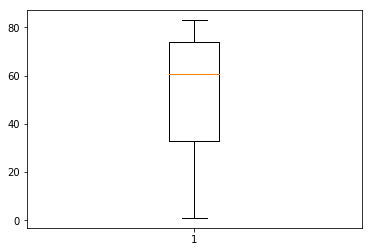

Visualizing features for Min


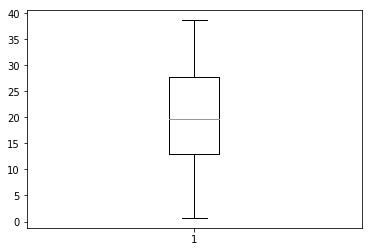

Visualizing features for Pts


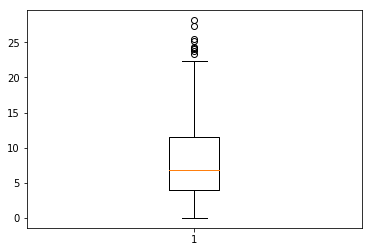

Visualizing features for OReb


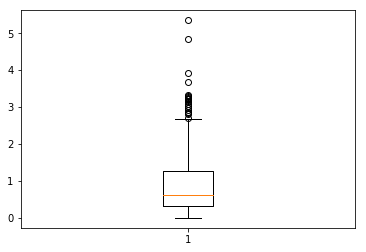

Visualizing features for Dreb


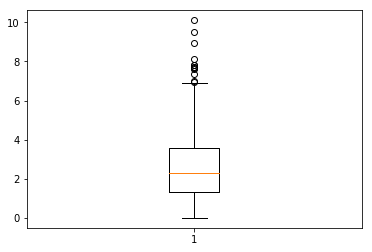

Visualizing features for Reb


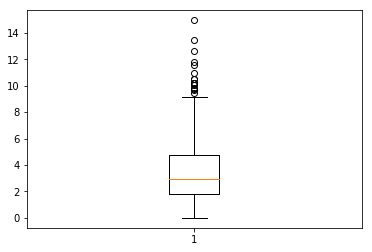

Visualizing features for Ast


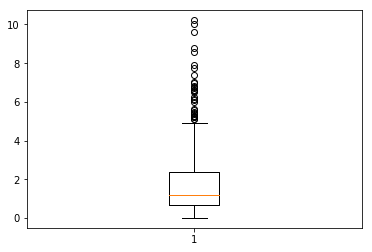

Visualizing features for Stl


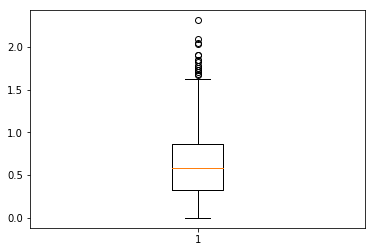

Visualizing features for Blk


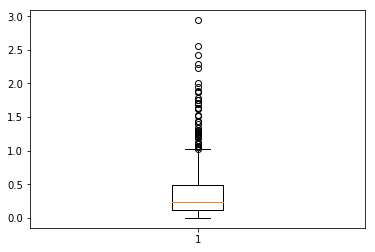

Visualizing features for TO


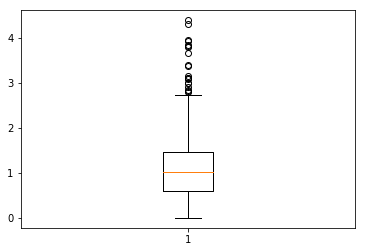

Visualizing features for PF


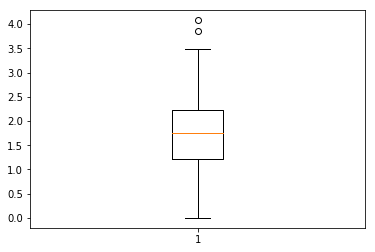

Visualizing features for FGM


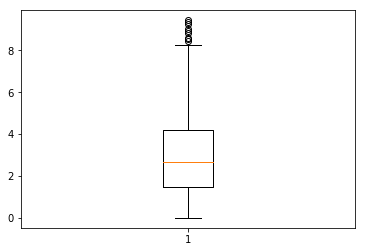

Visualizing features for FGA


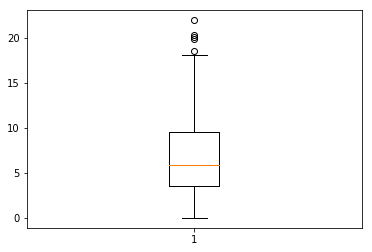

Visualizing features for FG%


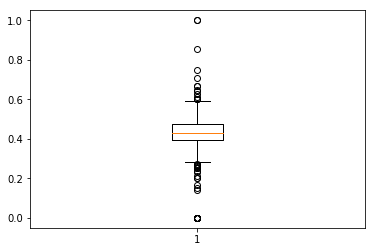

Visualizing features for 3PTM


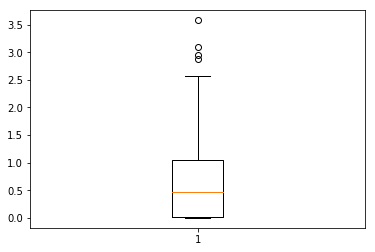

Visualizing features for 3PTA


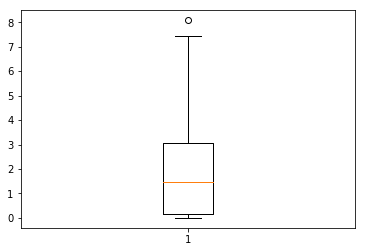

Visualizing features for 3PT%


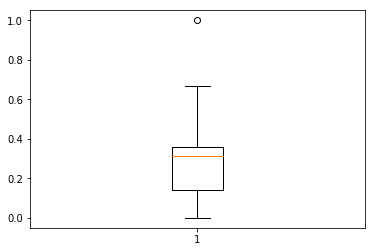

Visualizing features for FTM


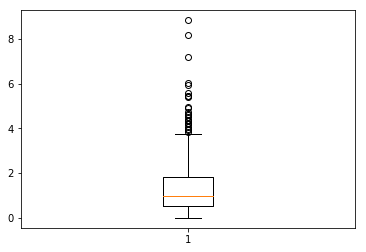

Visualizing features for FTA


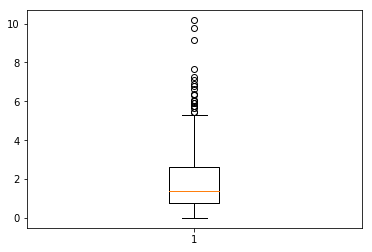

Visualizing features for FT%


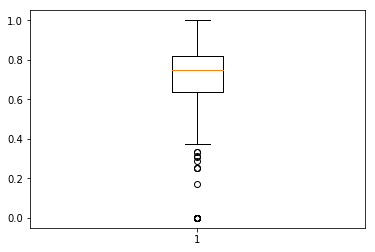

Visualizing features for yil


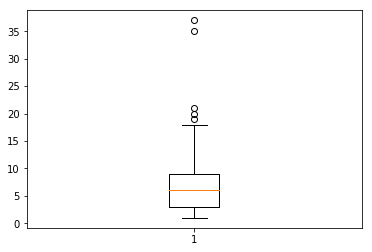

In [40]:
feature_names = df.columns.values[:-1]
for feature_name in feature_names:
    feature_visualization(feature_name, df[feature_name])

In [41]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
Games,1,0.66,0.54,0.36,0.53,0.5,0.34,0.42,0.31,0.42,0.57,0.55,0.52,0.36,0.32,0.29,0.24,0.39,0.39,0.38,0.18,0.39
Min,0.66,1,0.89,0.41,0.72,0.66,0.65,0.75,0.36,0.79,0.7,0.9,0.9,0.26,0.53,0.53,0.35,0.73,0.74,0.36,0.17,0.46
Pts,0.54,0.89,1,0.35,0.67,0.6,0.64,0.69,0.32,0.81,0.57,0.99,0.98,0.26,0.55,0.54,0.35,0.89,0.87,0.38,0.15,0.43
OReb,0.36,0.41,0.35,1,0.79,0.9,-0.043,0.16,0.72,0.27,0.6,0.42,0.3,0.45,-0.3,-0.32,-0.31,0.34,0.44,-0.015,0.014,0.22
Dreb,0.53,0.72,0.67,0.79,1,0.98,0.29,0.45,0.68,0.56,0.71,0.71,0.63,0.4,0.065,0.047,-0.0002,0.59,0.65,0.15,0.16,0.37
Reb,0.5,0.66,0.6,0.9,0.98,1,0.19,0.37,0.73,0.49,0.71,0.65,0.55,0.43,-0.055,-0.075,-0.1,0.53,0.61,0.1,0.12,0.34
Ast,0.34,0.65,0.64,-0.043,0.29,0.19,1,0.7,-0.038,0.82,0.34,0.62,0.67,0.018,0.45,0.48,0.32,0.59,0.55,0.26,0.13,0.28
Stl,0.42,0.75,0.69,0.16,0.45,0.37,0.7,1,0.15,0.72,0.51,0.67,0.7,0.092,0.47,0.5,0.32,0.6,0.6,0.25,0.043,0.38
Blk,0.31,0.36,0.32,0.72,0.68,0.73,-0.038,0.15,1,0.21,0.51,0.37,0.26,0.42,-0.2,-0.22,-0.23,0.29,0.37,-0.021,0.02,0.24
TO,0.42,0.79,0.81,0.27,0.56,0.49,0.82,0.72,0.21,1,0.58,0.8,0.82,0.16,0.39,0.41,0.26,0.77,0.77,0.27,0.11,0.36


In [67]:
df = df.drop(columns=['FGA', '3PTA', 'FTA'])

Mention the highly correlated features and talk about removing them

# Feature Engineering

Care about how the points were made.

In [42]:
df['3P/T'] = 3*df['3PTM']/(df['Pts'] + 0.00001)
df['FT/T'] = 2*df['FTM']/(df['Pts'] + 0.00001)
df['FG/T'] = 1*df['FGM']/(df['Pts'] + 0.00001)
df = df[[c for c in df if c != 'Survived'] + ['Survived']]
print(df.shape)
df.head()

(496, 25)


,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,3PTA,3PT%,FTM,FTA,FT%,yil,3P/T,FT/T,FG/T,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,4.30,0.299,8.15,9.76,0.835,7,0.136412,0.579041,0.332504,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,6.85,0.375,8.83,10.17,0.868,6,0.281695,0.645232,0.291925,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,5.89,0.403,5.41,6.33,0.854,8,0.279811,0.425816,0.346714,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,4.93,0.353,5.43,7.65,0.710,12,0.206651,0.429929,0.357878,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,0.18,0.083,5.46,6.78,0.805,3,0.001232,0.448460,0.387680,1


# Algorithm Analysis
knn, SVM, RF+XGB, naive bayes, maybe neural net

In [68]:
scaler = sk.preprocessing.StandardScaler()
# your code goes here
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]
print(f'features shape: {x.shape}')
print(f'labels shape: {y.shape}')
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)
# x_train = x.iloc[:-496//5]
# y_train = y.iloc[:-496//5]
print(f'training features shape: {x_train.shape}')
print(f'training labels shape: {y_train.shape}')
# x_test = x.iloc[-496//5:]
# y_test = x.iloc[-496//5:]
print(f'testing features shape: {x_test.shape}')
print(f'testing labels shape: {y_test.shape}')

features shape: (496, 21)
labels shape: (496,)
training features shape: (372, 21)
training labels shape: (372,)
testing features shape: (124, 21)
testing labels shape: (124,)


In [69]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


### SVM Performance Analysis

In [70]:
from sklearn.svm import SVC


param_grid = {'svm__kernel': ['linear', 'rbf', 'poly']}

# svm_ = svm.SVC()
svm_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('svm', svm.SVC())])
svm_gs = model_selection.GridSearchCV(svm_pipeline, param_grid, scoring="accuracy", cv=5)
svm_cv_results = model_selection.cross_val_score(svm_gs, x, y=y, cv=10)

svm_gs.fit(x, y)

print(f'overall svm accuracy is {svm_cv_results.mean()}')
print(f'best svm model accuracy is {svm_gs.best_score_}')
print(f'best svm params are {svm_gs.best_params_}')

overall svm accuracy is 0.6958199279711884
best svm model accuracy is 0.655241935483871
best svm params are {'svm__kernel': 'linear'}


In [71]:
best_svm = svm_gs.best_estimator_
best_svm.fit(x, y) 

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [72]:
svm_p = model_selection.cross_val_predict(best_svm, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(svm_p, y))
print(metrics.classification_report(svm_p, y))

confusion matrix: 
[[191  74]
 [ 71 160]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       265
           1       0.68      0.69      0.69       231

   micro avg       0.71      0.71      0.71       496
   macro avg       0.71      0.71      0.71       496
weighted avg       0.71      0.71      0.71       496



In [73]:
y_pred_svm = best_svm.predict(x_test)
y_pred_svm[:, None].shape

(124, 1)

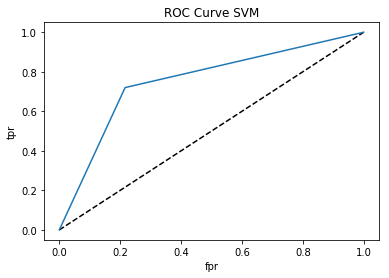

In [74]:
best_svm.fit(x_train, y_train)
y_pred_svm = best_svm.predict(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_svm)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='SVM') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.show()

### KNN Performance Analysis

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
param_grid = {'knn__n_neighbors': list(range(3,20,3))}

knn_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('knn', KNeighborsClassifier())])
knn_gs = model_selection.GridSearchCV(knn_pipeline, param_grid, scoring="accuracy",cv=5)
knn_cv_results = model_selection.cross_val_score(knn_gs, x, y=y, cv=10)

knn_gs.fit(x, y)

print(f'overall knn accuracy is {knn_cv_results.mean()}')
print(f'best knn model accuracy is {knn_gs.best_score_}')
print(f'best knn params are {knn_gs.best_params_}')

overall knn accuracy is 0.6596454581832734
best knn model accuracy is 0.5846774193548387
best knn params are {'knn__n_neighbors': 12}


In [77]:
best_knn = knn_gs.best_estimator_
best_knn.fit(x_test, y_test)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform'))])

In [78]:
knn_p = model_selection.cross_val_predict(best_knn, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(knn_p, y))
print(metrics.classification_report(knn_p, y))

confusion matrix: 
[[190  94]
 [ 72 140]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       284
           1       0.60      0.66      0.63       212

   micro avg       0.67      0.67      0.67       496
   macro avg       0.66      0.66      0.66       496
weighted avg       0.67      0.67      0.67       496



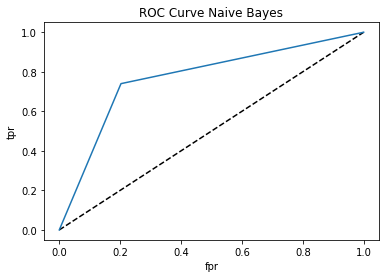

In [79]:
best_knn.fit(x_train, y_train)
y_pred_knn = best_knn.predict(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

### Random Forest Performance Analysis

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
param_grid = {
    'rf__max_depth': list(range(5,50,5)),
    'rf__min_samples_leaf': [4, 8, 10, 12, 16],
    'rf__max_features': ['sqrt', 'log2']
}

rf_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('rf', RandomForestClassifier())])
rf_gs = model_selection.GridSearchCV(rf_pipeline, param_grid, scoring="accuracy",cv=5)
rf_cv_results = model_selection.cross_val_score(rf_gs, x, y=y, cv=10)

rf_gs.fit(x,y)

print(f'overall rf accuracy is {rf_cv_results.mean()}')
print(f'best rf model accuracy is {rf_gs.best_score_}')
print(f'best rf params are {rf_gs.best_params_}')

overall rf accuracy is 0.5999119647859145
best rf model accuracy is 0.5665322580645161
best rf params are {'rf__max_depth': 5, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 16}


In [82]:
best_rf = rf_gs.best_estimator_
best_rf.fit(x_test, y_test)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [83]:
rf_p = model_selection.cross_val_predict(best_rf, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(rf_p, y))
print(metrics.classification_report(rf_p, y))

confusion matrix: 
[[184 109]
 [ 78 125]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       293
           1       0.53      0.62      0.57       203

   micro avg       0.62      0.62      0.62       496
   macro avg       0.62      0.62      0.62       496
weighted avg       0.63      0.62      0.63       496



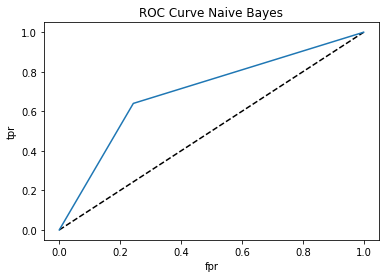

In [84]:
best_rf.fit(x_train, y_train)
y_pred_rf = best_rf.predict(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

In [85]:
y_pred_rf

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [86]:
y_test

447    0
486    0
353    1
94     0
124    1
260    1
354    0
229    0
287    0
164    0
476    0
399    1
154    0
356    0
112    1
50     1
222    1
387    0
336    0
461    0
153    0
347    0
103    1
436    0
48     1
227    1
189    0
435    0
432    0
219    0
      ..
46     1
375    0
47     0
381    0
140    0
326    1
157    1
274    0
380    1
352    1
178    1
444    0
495    0
135    0
217    0
225    0
382    0
158    1
3      1
177    1
327    0
279    1
258    0
409    0
301    0
35     1
473    0
83     1
175    1
441    0
Name: Survived, Length: 124, dtype: int64

### Naïve Bayes Performance Analysis

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
nb = GaussianNB()
results_nb = model_selection.cross_val_score(nb, x, y=y, cv=10)
print(f'naive bayes accuracy {results_nb.mean()}')

naive bayes accuracy 0.7004929971988795


In [89]:
cvp = model_selection.cross_val_predict(nb, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(cvp, y))

print(metrics.classification_report(cvp, y))

confusion matrix: 
[[195  82]
 [ 67 152]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       277
           1       0.65      0.69      0.67       219

   micro avg       0.70      0.70      0.70       496
   macro avg       0.70      0.70      0.70       496
weighted avg       0.70      0.70      0.70       496



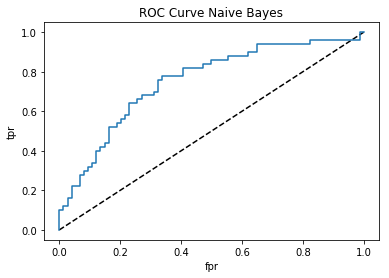

In [90]:
nb.fit(x_train, y_train)
y_pred_nb = nb.predict_proba(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_nb[:,1])


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

# Data Analysis

# Outcome 